In [3]:
import networkx as nx # make sure you installed networkx
import numpy as np
import pandas as pd

In [22]:
# Graph including only positive corsi influences
# Read in data
df = pd.read_csv("../../data/defense/defensemen_edgelist_corsi_positive.csv")

# Create a network of nodes which are players and the links are players that played together
# We create 2 graphs, one for each relationship direction and then compose them for our total graph
df = df.rename(columns={'corsi_influence_on_player2':'weight'})
G0 = nx.Graph()
G0 = nx.from_pandas_edgelist(df, 'playerId1', 'playerId2', ['weight'],create_using=nx.DiGraph)

df = df.rename(columns={'weight':'notweight','corsi_influence_on_player1':'weight'})
G1 = nx.Graph()
G1 = nx.from_pandas_edgelist(df, 'playerId2', 'playerId1', edge_attr='weight',create_using=nx.DiGraph)

G = nx.compose(G0, G1)

# Delete edges with 0 weight
edge_attrs = nx.get_edge_attributes(G, "weight")
for edge in edge_attrs.keys():
    if edge_attrs[edge] == 0:
        G.remove_edge(edge[0], edge[1])

# Add player names to nodes
players_df = pd.read_csv("../../data/defense/aggregate_defensemen.csv", index_col='playerId', header=0)
player_names = dict.fromkeys(G.nodes)
for player in G.nodes:
    player_name = players_df.loc[[player]]["playerName"].values[0]
    player_names[player] = player_name

nx.set_node_attributes(G, player_names, "playerName")

# output a gephi file for ez visualization
nx.write_gexf(G, 'defense-positive.gexf')


{(8475825, 8475764): 0.0260717602197065, (8473446, 8477073): 0.0424884018154556, (8473446, 8476850): 0.0109516232326716, (8473446, 8473700): 0.0915473473156576, (8473446, 8475197): 0.0403806869129327, (8473446, 8474207): 0.0118943716243136, (8473446, 8474013): 0.0458564027414144, (8473446, 8477507): 0.0013631251363406, (8473446, 8469492): 0.0089699084991982, (8473446, 8470699): 0.0252733557126928, (8473446, 8471436): 0.0318281342669788, (8473446, 8470317): 0.1309532794381124, (8477073, 8473446): 0.0377346346297821, (8475796, 8477355): 0.056546885623355, (8475796, 8477452): 0.0531453417163824, (8475796, 8476931): 0.0307926184217117, (8475796, 8475755): 0.0268947828546742, (8475796, 8469470): 0.0252115532171435, (8475796, 8473426): 0.1257577054494089, (8477462, 8479026): 0.021014905201707, (8477462, 8476979): 0.0208075787146582, (8479998, 8481600): 0.0101858791413327, (8475181, 8480184): 0.0077211279025877, (8475181, 8480865): 0.0210503272668844, (8475181, 8474497): 0.0385462248111709, (

# Basic Statistics


In [5]:
# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes: ", num_nodes)
print("Number of edges: ", num_edges)


Number of nodes:  550
Number of edges:  4452


In [6]:
# Number of connected components
is_strongly_connected = nx.is_strongly_connected(G)
print("Is graph strongly connected? ", is_strongly_connected)
num_strongly_connected_components = nx.number_strongly_connected_components(G)
print("Number of strongly connected components: ", num_strongly_connected_components)

Is graph strongly connected?  False
Number of strongly connected components:  2


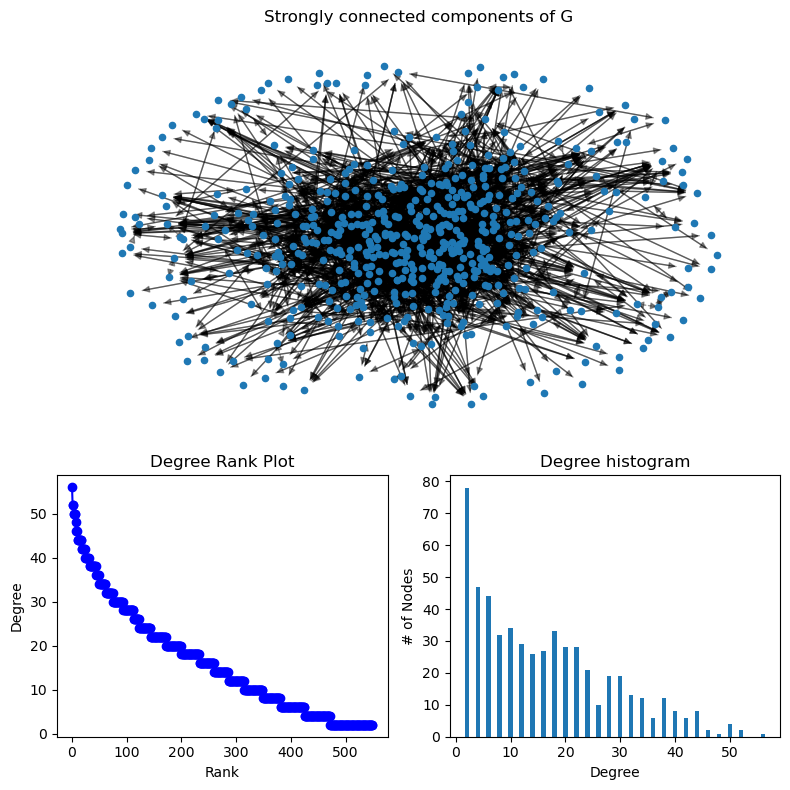

In [6]:
# Degree distribution
import matplotlib.pyplot as plt
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.strongly_connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Strongly connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


In [7]:
# Clustering coefficient
clustering_coefficients = nx.clustering(G)
# print("Clustering coefficient: ", clustering_coefficients)
average_clustering = nx.average_clustering(G)
print("Average clustering coefficient: ", average_clustering)


Average clustering coefficient:  0.26636734680272417


In [8]:
# Path length
# shortest_paths = nx.shortest_path(G)
# print("Shortest paths: ", shortest_paths)
# shortest_path_lengths = nx.shortest_path_length(G)
# print("Shortest path lengths: ", shortest_path_lengths)
# average_shortest_path_length = nx.average_shortest_path_length(G)
# print("Average shortest path length: ", average_shortest_path_length)


NetworkXError: Graph is not weakly connected.

# Centrality Measures

In [9]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
# print("Degree centrality: ", degree_centrality)
in_degree_centrality = nx.in_degree_centrality(G)
# print("In degree centrality: ", in_degree_centrality)
out_degree_centrality = nx.out_degree_centrality(G)
# print("Out degree centrality: ", out_degree_centrality)

# Community Analysis

In [9]:
import networkx.algorithms.community as nxc

# Greedy Modularity
greedy_communities = nxc.greedy_modularity_communities(G)
greedy_communities_weight = nxc.greedy_modularity_communities(G, weight='weight')
print(greedy_communities)
print(greedy_communities_weight)

i = 0



[frozenset({8469760, 8470273, 8476931, 8468484, 8474628, 8481542, 8470281, 8481546, 8478476, 8477452, 8476429, 8477205, 8477462, 8475167, 8477472, 8468513, 8480803, 8475171, 8474659, 8480035, 8478500, 8475430, 8474151, 8475177, 8475181, 8475182, 8465202, 8476979, 8479026, 8477495, 8476473, 8480831, 8471873, 8477506, 8480070, 8464966, 8475462, 8481609, 8473673, 8470601, 8470607, 8477009, 8468309, 8478038, 8474717, 8482655, 8480865, 8478563, 8478055, 8474218, 8475755, 8479341, 8478062, 8466285, 8475246, 8475759, 8470640, 8479345, 8482671, 8477300, 8477814, 8468598, 8471683, 8468101, 8471686, 8476300, 8471693, 8475795, 8475796, 8471701, 8477845, 8471958, 8459670, 8474520, 8477851, 8479388, 8477085, 8469665, 8477346, 8465058, 8470187, 8474027, 8480172, 8479410, 8480950, 8471735, 8480184, 8480955, 8474048, 8477384, 8474568, 8476875, 8475342, 8478416, 8474066, 8476886, 8474584, 8471769, 8467931, 8473565, 8480222, 8469470, 8466142, 8471269, 8479976, 8469992, 8471274, 8476906, 8477932, 8474604

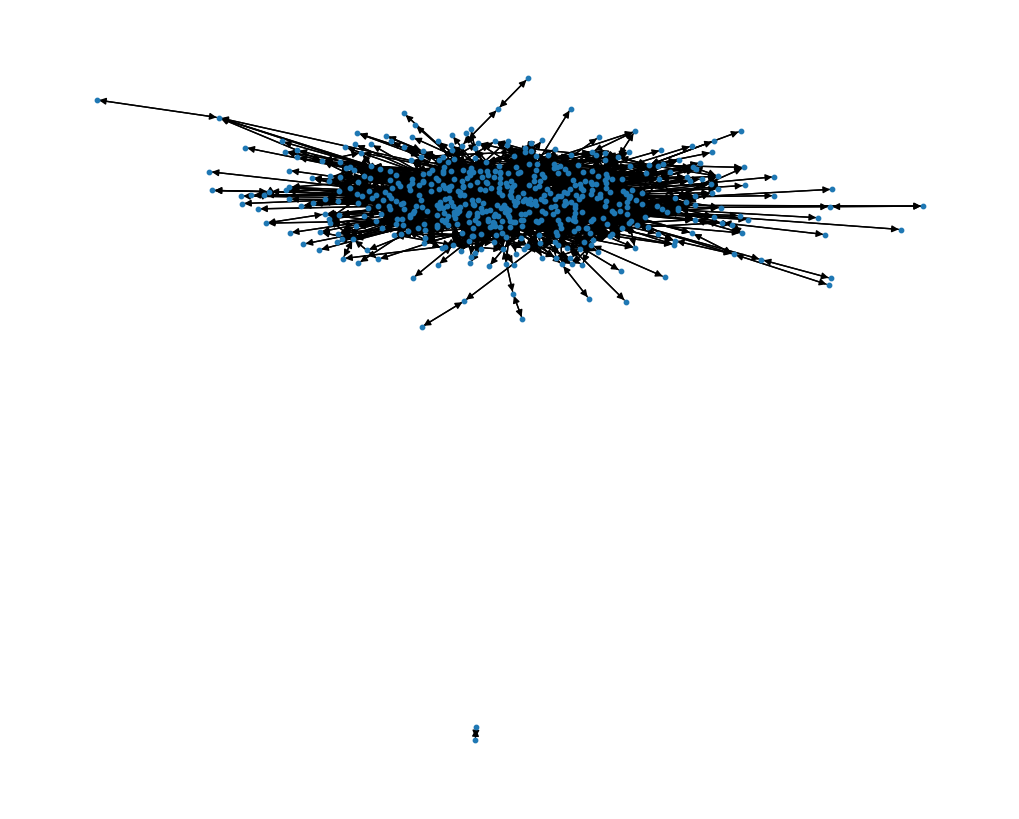

In [ ]:
# Plot the network
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_spring(G, node_size=10)

In [ ]:
# number of edges
G.number_of_edges()


1454

In [ ]:
# number of nodes
G.number_of_nodes()

321

In [ ]:
#basic analysis
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [ ]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  321
Number of edges:  1454

Average degree:  9.059190031152648
Average degree (alternate calculation) 9.059190031152648

Minimum degree:  2
Maximum degree:  24


In [ ]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

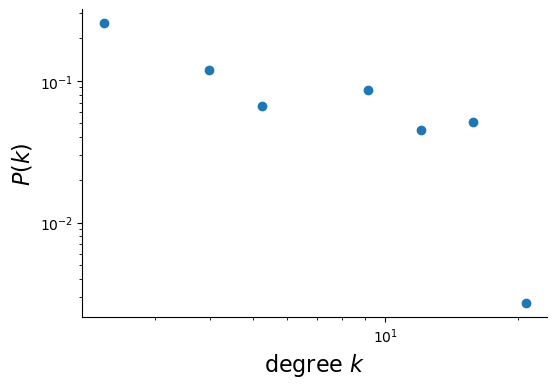

In [ ]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [ ]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, 10, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

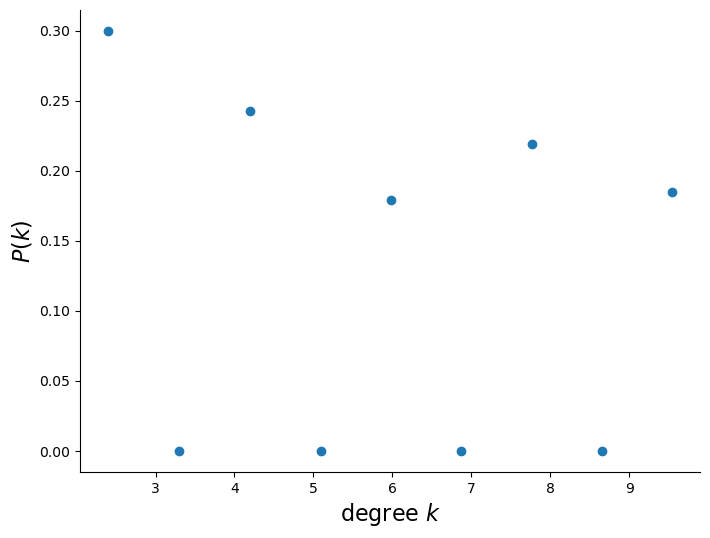

In [ ]:
fig = plt.figure(figsize=(8,6))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [ ]:
print(nx.info(G))

DiGraph with 321 nodes and 1454 edges


/tmp/ipykernel_478740/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


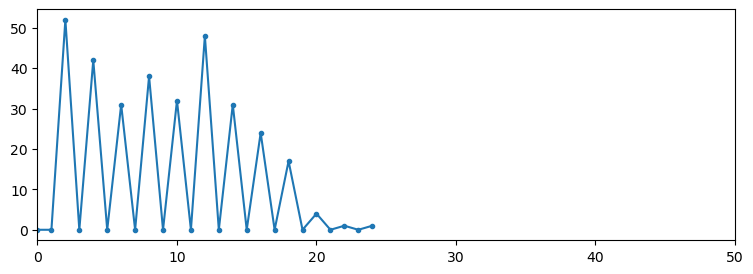

In [ ]:
hist = nx.degree_histogram(G)
plt.figure(figsize=(9,3))
plt.plot(hist, marker = '.')
plt.xlim((0,50))
plt.show()

In [ ]:
def all_networks(g, start, end):
    def plotpath(g, path):
        h = nx.subgraph(g, path)               
        nx.draw(h, pos = pos, node_color = 'r', edge_color = 'r', 
                node_size = 100, aplha = 0.7, width = 2)

    paths = nx.all_shortest_paths(g, source = start, target = end)
    paths = [i for i in paths]
    h = nx.subgraph(g, sum([i for i in paths], []))    
    labels = nx.get_node_attributes(h, 'label')   
    i = nx.subgraph(g, sum([nx.neighbors(g, i) for i in h.nodes()], []))  
    pos = nx.fruchterman_reingold_layout(i)
    
    plt.figure(figsize=(9,6))
    nx.draw(i, pos = pos, node_color = 'b', edge_color = 'b', node_size = 50, alpha = 0.5)
    [plotpath(g, i) for i in paths]
    nx.draw_networkx_labels(i, pos = pos, labels = labels, font_size = 10)
    plt.show()

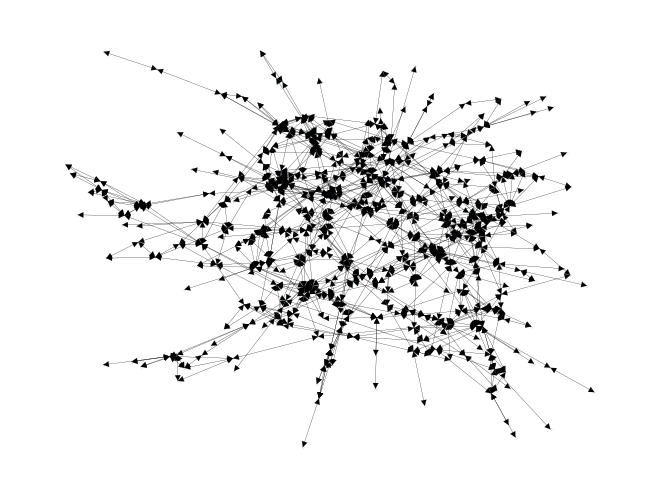

In [ ]:
nx.draw(G, pos=nx.spring_layout(G), node_size=0.01, width=0.1)


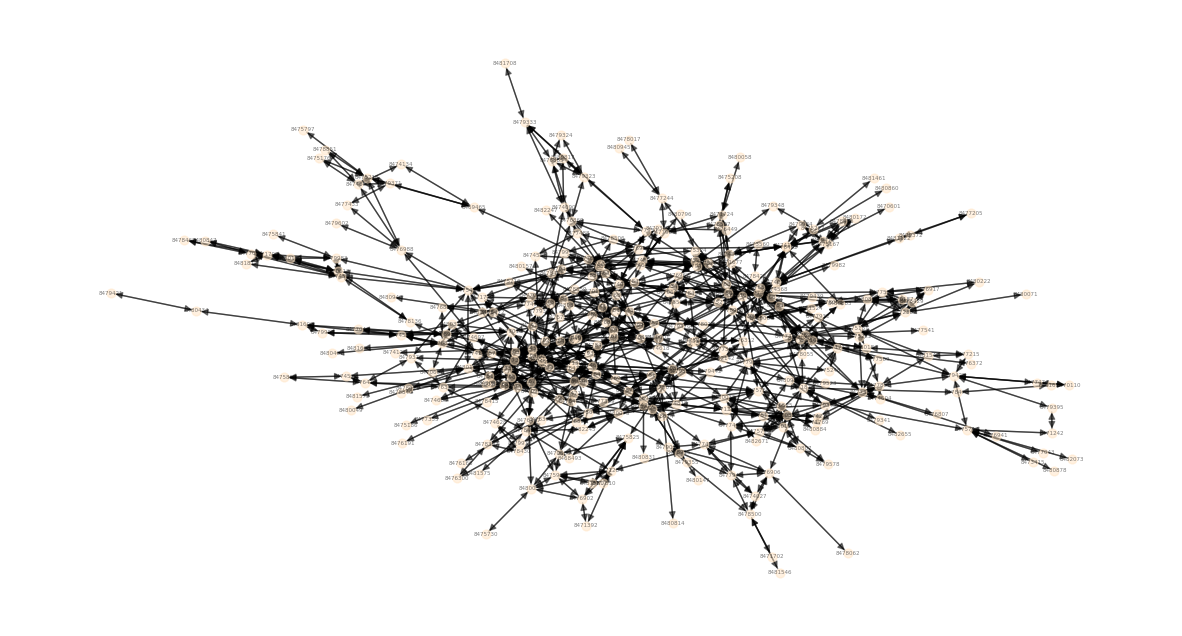

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

nx.draw_spring(G, node_color='bisque', with_labels=True , node_size = 40 , font_size = 4 , alpha = 0.5)